In [1]:
import meep as mp

In [2]:
cell = mp.Vector3(16, 8, 0)

In [3]:
geometry = [
    mp.Block(
        mp.Vector3(mp.inf, 1, mp.inf),
        center=mp.Vector3(),
        material=mp.Medium(epsilon=12),
    )
]

sources = [
    mp.Source(
        mp.ContinuousSource(frequency=0.15), component=mp.Ez, center=mp.Vector3(-7, 0)
    )
]

pml_layers = [mp.PML(1.0)]

resolution = 10

sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
)

     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)


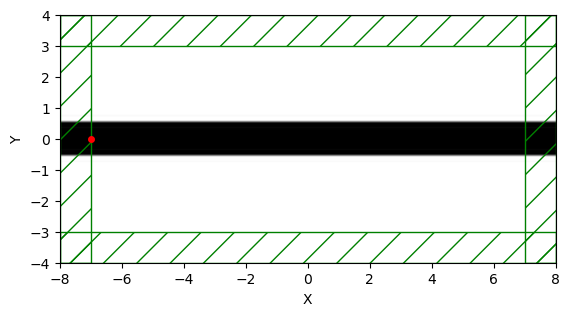

In [4]:
import matplotlib.pyplot as plt

plt.figure(dpi=100)
sim.plot2D()
plt.show()

-----------
Initializing structure...
time for choose_chunkdivision = 0.00494003 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 10
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.00959802 s
-----------
run 0 finished at t = 200.0 (4000 timesteps)
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)


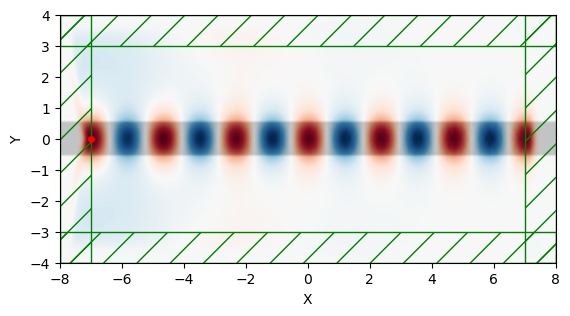

In [5]:
k= sim.run(until=200)

type(k)

plt.figure(dpi=100)
sim.plot2D(fields=mp.Ez)
plt.show()

In [6]:
sim.reset_meep()
f = plt.figure(dpi=100)
Animate = mp.Animate2D(fields=mp.Ez, f=f, realtime=False, normalize=True)
plt.close()

sim.run(mp.at_every(1, Animate), until=100)
plt.close()

-----------
Initializing structure...
time for choose_chunkdivision = 8.60691e-05 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 10
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)


time for set_epsilon = 0.00935888 s
-----------
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
Normalizing field data...
run 1 finished at t = 100.0 (2000 timesteps)


In [7]:
filename = "straight_waveguide.mp4"
Animate.to_mp4(10, filename)

from IPython.display import Video

Video(filename)

Generating MP4...


In [11]:
from Meep_bot import Meepbot

mpbot = Meepbot() # 인스턴스 호출

In [12]:
mpbot.start_sim()

import numpy as np
import matplotlib.pyplot as plt

import meep as mp
from meep.materials import SiO2

resolution = 100  # pixels/um

dpml = 1.0
pml_layers = [mp.PML(thickness=dpml)]

r = 1.0  # radius of cylinder
dair = 2.0  # air padding thickness

s = 2 * (dpml + dair + r)
cell_size = mp.Vector3(s, s)

wvl = 1.0
fcen = 1 / wvl

# is_integrated=True necessary for any planewave source extending into PML
sources = [
    mp.Source(
        mp.GaussianSource(fcen, fwidth=0.1 * fcen, is_integrated=True),
        center=mp.Vector3(-0.5 * s + dpml),
        size=mp.Vector3(0, s),
        component=mp.Ez,
    )
]

symmetries = [mp.Mirror(mp.Y)]

geometry = [mp.Cylinder(material=SiO2, center=mp.Vector3(), radius=r, height=mp.inf)]

sim = mp.Simulation(
    resolution=resolution,
    cell_size=cell_size,
    boundary_layers=pml_layers,
    sources=sources,
    k_point=mp.Vector3(),
    symmetries=symmetries,
    geometry=geometry,
)

dft_fields = sim.add_dft_fields(
    [mp.Dz, mp.Ez],
    fcen,
    0,
    1,
    center=mp.Vector3(),
    size=mp.Vector3(2 * r, 2 * r),
    yee_grid=True,
)

# closed box surrounding cylinder for computing total incoming flux
flux_box = sim.add_flux(
    fcen,
    0,
    1,
    mp.FluxRegion(center=mp.Vector3(x=-r), size=mp.Vector3(0, 2 * r), weight=+1),
    mp.FluxRegion(center=mp.Vector3(x=+r), size=mp.Vector3(0, 2 * r), weight=-1),
    mp.FluxRegion(center=mp.Vector3(y=+r), size=mp.Vector3(2 * r, 0), weight=-1),
    mp.FluxRegion(center=mp.Vector3(y=-r), size=mp.Vector3(2 * r, 0), weight=+1),
)

sim.run(until_after_sources=100)

Dz = sim.get_dft_array(dft_fields, mp.Dz, 0)
Ez = sim.get_dft_array(dft_fields, mp.Ez, 0)
absorbed_power_density = 2 * np.pi * fcen * np.imag(np.conj(Ez) * Dz)

dxy = 1 / resolution**2
absorbed_power = np.sum(absorbed_power_density) * dxy
absorbed_flux = mp.get_fluxes(flux_box)[0]
err = abs(absorbed_power - absorbed_flux) / absorbed_flux
print(
    "flux:, {} (dft_fields), {} (dft_flux), {} (error)".format(
        absorbed_power, absorbed_flux, err
    )
)

mpbot.end_sim() # 채널 이름 다른거에 보내고 싶으면 , channel ="보낼 채널명" 자신이 만든 앱이 채널에 포함되어있어야함


시뮬레이션을 시작...
-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.000808001 s


Working in 2D dimensions.
Computational cell is 8 x 8 x 0 with resolution 100
     cylinder, center = (0,0,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.214578 s
lorentzian susceptibility: frequency=9.67865, gamma=0.0806554
-----------
Meep progress: 8.06/200.0 = 4.0% done in 4.0s, 95.3s to go
on time step 1612 (time=8.06), 0.00248208 s/step
Meep progress: 17.75/200.0 = 8.9% done in 8.0s, 82.2s to go
on time step 3551 (time=17.755), 0.00206366 s/step
Meep progress: 28.115000000000002/200.0 = 14.1% done in 12.0s, 73.4s to go
on time step 5624 (time=28.12), 0.00192973 s/step
Meep progress: 40.075/200.0 = 20.0% done in 16.0s, 63.9s to go
on time step 8016 (time=40.08), 0.00167273 s/step
Meep progress: 50.995000000000005/200.0 = 25.5% done in 20.0s, 58.5s to go
on time step 10201 (time=51.005), 0.00183126 s/step
Meep progress: 62.535000000000004/200.0 = 31.3% done in 24.0s, 52.8s to go
on time step 1251

시뮬레이션을 시작...
     cylinder, center = (0,0,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


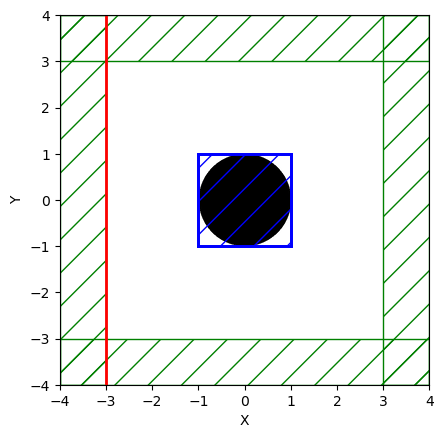

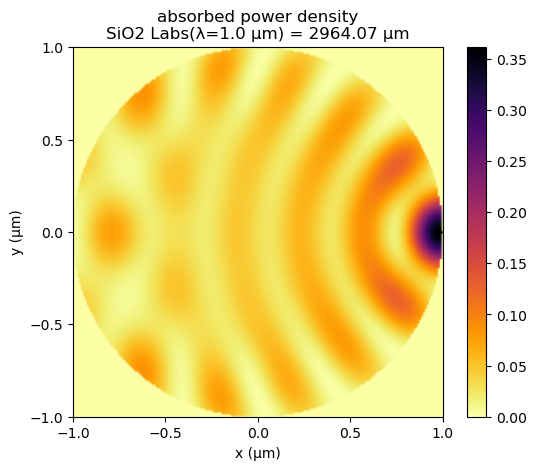

In [13]:
mpbot.start_sim() # 채널 이름 다른거에 보내고 싶으면 , channel ="보낼 채널명" 자신이 만든 앱이 채널에 포함되어있어야함
plt.figure()
sim.plot2D()

plt.figure()
x = np.linspace(-r, r, Dz.shape[0])
y = np.linspace(-r, r, Dz.shape[1])
plt.pcolormesh(
    x,
    y,
    np.transpose(absorbed_power_density),
    cmap="inferno_r",
    shading="gouraud",
    vmin=0,
    vmax=np.amax(absorbed_power_density),
)
plt.xlabel("x (μm)")
plt.xticks(np.linspace(-r, r, 5))
plt.ylabel("y (μm)")
plt.yticks(np.linspace(-r, r, 5))
plt.gca().set_aspect("equal")
plt.title(
    "absorbed power density"
    + "\n"
    + "SiO2 Labs(λ={} μm) = {:.2f} μm".format(
        wvl, wvl / np.imag(np.sqrt(SiO2.epsilon(fcen)[0][0]))
    )
)
plt.colorbar()

mpbot.end_sim()